# Expert Demonstrations
Generate experience replay consisting of state transitions from user play.

## Initial setup

In [9]:
from vizdoom import *
import sys
sys.path.insert(0, "../python")
import numpy as np

In [4]:
# Creates and initializes ViZDoom environment.
def initialize_vizdoom(config_file_path):
    print("Initializing doom... ", end=""), sys.stdout.flush()
    game = DoomGame()
    game.load_config(config_file_path)
    game.set_window_visible(True)
    game.init()
    print("Done.")
    return game

## Collect state transitions

In [10]:
config_file_path = "../config/pretraining.cfg" # must be in SPECTATOR mode
episodes = 1
game = initialize_vizdoom(config_file_path)

states = []
coordinates = []
actions = []
rewards = []
for i in range(episodes):
    # Create new episode
    game.new_episode()
    while not game.is_episode_finished():
        # Get state, advance current user action, and obtain reward
        states.append(game.get_state())
        x = game.get_game_variable(GameVariable.POSITION_X)
        y = game.get_game_variable(GameVariable.POSITION_Y)
        z = game.get_game_variable(GameVariable.POSITION_Z)
        angle = game.get_game_variable(GameVariable.ANGLE)
        coordinates.append(np.array([x, y, z, angle]))
        game.advance_action()
        actions.append(game.get_last_action())
        rewards.append(game.get_last_reward())

    print("Episode %d finished!\r" % i, end="")

print("\nDone.")
game.close()

Initializing doom... Done.
Done.de %d finished!


In [7]:
# After this, run inference on networks to see their Q-value heatmaps 
# for each action across the map

Last reward: 0.99
Last state transition:


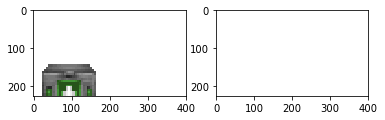

In [23]:
import matplotlib.pyplot as plt
% matplotlib inline

print("Last reward: %.2f" % rewards[-2])
print("Last state transition:")
fig, ax = plt.subplots(1, 2)
s1 = ax[0].imshow(states[-2].screen_buffer.transpose([1, 2, 0]))
s2 = ax[1].imshow(states[-1].screen_buffer.transpose([1, 2, 0]))

In [18]:
print(rewards)

[-0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, 0.99, -0.01]
